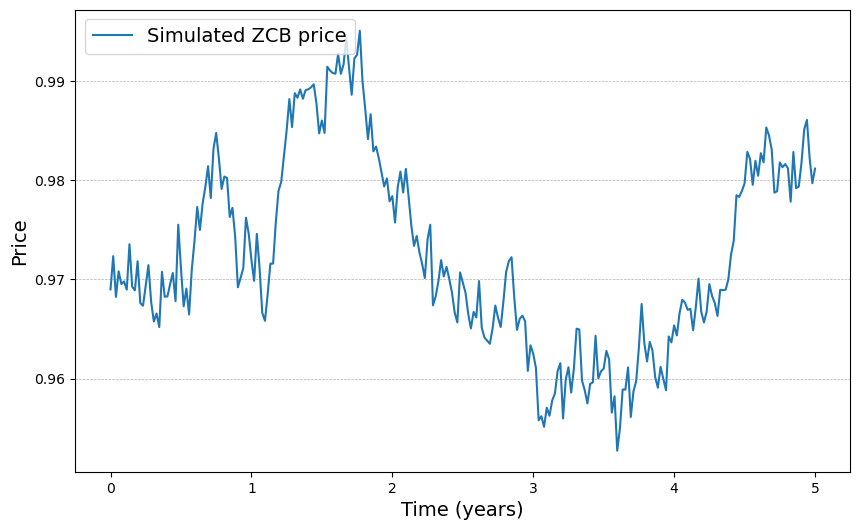

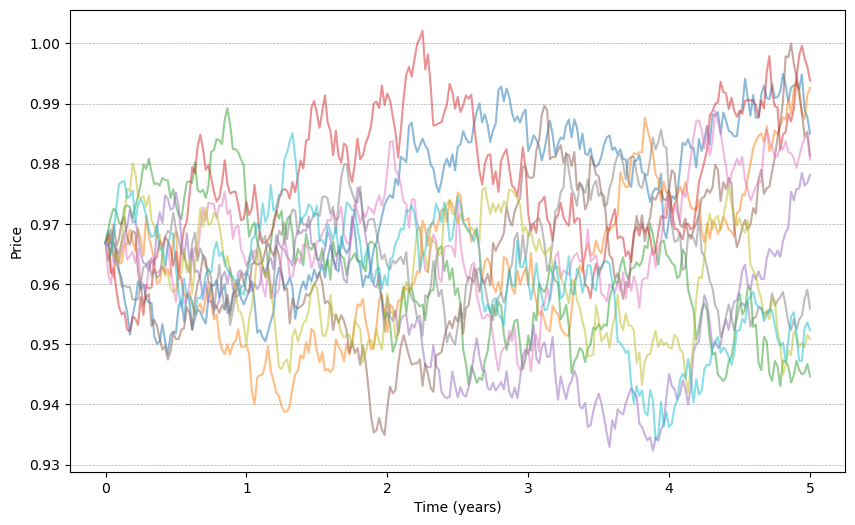

In [1]:
import numpy as np
import pandas as pd
from scipy.special import ndtr
from scipy.stats import norm, ncx2
from scipy.optimize import minimize
from numpy.polynomial.hermite import hermfit, hermval, hermder
import matplotlib.pyplot as plt
from typing import Union, List
import seaborn as sns
np.random.seed(30)

def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity  - b) + beta**2 / (4 * kappa) * b**2
    
    return np.exp(- a - b * initial_short_rate)


import numpy as np
def simulate_vasicek(initial_short_rate: float, kappa: float, theta: float,
                     beta: float, horizon: float, 
                     dt: float=1.0/12, num_sim: int=10000):
    std_rates = np.sqrt(beta**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
    
    num_periods = int(horizon / dt)
    short_rates = np.empty((num_sim, num_periods + 1))
    short_rates[:, 0] = initial_short_rate
    
    error_terms = np.random.normal(scale=std_rates, size=(num_sim, num_periods))
    
    for i in range(1, num_periods + 1): 
        
        short_rates[:, i] = theta + (short_rates[:, i - 1] - theta) * np.exp(-kappa * dt) + error_terms[:, i - 1]

    return short_rates

short_rate = 0.03
theta = 0.03
kappa = 1.0
beta = 0.02
dt = 1/52
time_points = np.arange(0, 5.01, dt)
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=1)
horizon=5

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=horizon,
                                              initial_short_rate=short_rates_q,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)
num_simulations = zero_bond_price.shape[0]


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i in range(num_simulations):
    plt.plot(time_points, zero_bond_price[i, :], label= "Simulated ZCB price", color ='tab:blue')

plt.xlabel('Time (years)',fontsize=14)
plt.ylabel('Price',fontsize=14)
#plt.title('Simulated prices of a Zero Coupon bond using the Vasicek Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left',fontsize=14)
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/zcb_1_sim.png")
plt.show()
plt.close()
np.random.seed(13)
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=10)
horizon=10

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=horizon,
                                              initial_short_rate=short_rates_q,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)

num_simulations = zero_bond_price.shape[0]

colors = sns.color_palette("Set3", num_simulations)

plt.figure(figsize=(10, 6)) 

for i in range(num_simulations):
    plt.plot(time_points, zero_bond_price[i, :], alpha =0.5)

plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/zcb_10_sim.png")
plt.show()
plt.close()

